In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1
import fastf1.plotting
from fastf1.core import Laps


fastf1.Cache.enable_cache('../cache')
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [34]:
year = 2022
gp_round = 5
ses = 'Q'

In [35]:
session = fastf1.get_session(year, gp_round, ses)
session.load(weather=True , telemetry=True)

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63', '5', '3', '47', '20', '24', '23', '6', '31']


In [36]:
drivers = pd.unique(session.laps['Driver'])

In [37]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [38]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [40]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

In [49]:
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

def fastest_lap_comparison(fastest_laps):

    fig, ax = plt.subplots(figsize=(15, 10))

    plt.style.use('dark_background')

    ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
    ax.set_yticks(fastest_laps.index)
    ax.set_yticklabels(fastest_laps['Driver'])

    plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

    ax.invert_yaxis()

    ax.set_axisbelow(True)
    ax.xaxis.grid(True, which='major', linestyle='--', color='grey', zorder=-5000)

    return fig

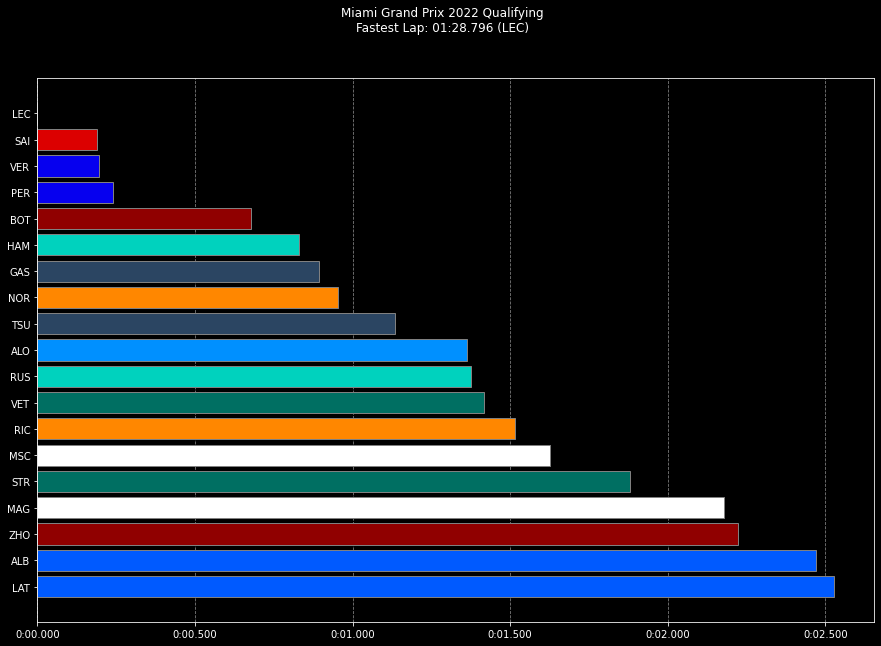

In [50]:
fig